In [8]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models, Sequential
try:
  from scikeras.wrappers import KerasClassifier, KerasRegressor
except ImportError:
    !python -m pip install scikeras
    from scikeras.wrappers import KerasClassifier, KerasRegressor
  


import cv2
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(linewidth=100000, precision=3)
import sys
import pandas as pd

from skimage import data, io, filters
from skimage.transform import resize
from skimage.transform import rotate

from sklearn.model_selection import GridSearchCV

In [2]:
(img_train, label_train), (img_test, label_test) = tfds.as_numpy(tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

2022-03-06 11:58:30.844345: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#Using a NNet for classification

### Prelude
- The data is in the form of a 28x28 matrix that contains the greyscale pixel of an object. To use it for a Neural network, we will apply convolution to it  and then pool it into a smaller matrix as the data procesing step i.e. we will use a CNN. In addition to that, we normalize the image's pixel values to be a number between 0 and 1 by dividing by 255

In [5]:
img_train = img_train / 255
img_test = img_test / 255

#### CNN with Maxpooling

In [20]:
model = models.Sequential() # Create the model
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28 , 1))) # add the first layer to convole the input matrix using a 3x3 kernal with a relu activation to prevent linearity
model.add(layers.MaxPooling2D(pool_size = (2, 2))) #pool to decrease dimension of image
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2))) #pool
model.add(layers.Conv2D(112, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(112, activation='relu'))
model.add(layers.Dense(10))

In [21]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 56)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 112)         56560     
                                                                 
 flatten_4 (Flatten)         (None, 1008)             

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(img_train, label_train, epochs=10, 
                    validation_data=(img_test, label_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4645 - accuracy: 0.8290 - val_loss: 0.3538 - val_accuracy: 0.8748
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3060 - accuracy: 0.8878 - val_loss: 0.3024 - val_accuracy: 0.8935
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2578 - accuracy: 0.9036 - val_loss: 0.2762 - val_accuracy: 0.8996
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2280 - accuracy: 0.9153 - val_loss: 0.2670 - val_accuracy: 0.9066
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2009 - accuracy: 0.9246 - val_loss: 0.2764 - val_accuracy: 0.9033
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1806 - accuracy: 0.9326 - val_loss: 0.2612 - val_accuracy: 0.9103
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1584 - accuracy: 0.9391 - val_loss: 0.2539 - val_accuracy:

In [27]:
model.layers[0].filters

28

313/313 - 1s - loss: 0.3055 - accuracy: 0.9088 - 644ms/epoch - 2ms/step


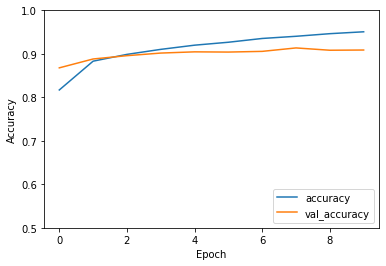

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(img_test,  label_test, verbose=2)

#### CNN with avgerage pooling

In [23]:
model = models.Sequential() # Create the model
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28 , 1))) # add the first layer to convole the input matrix using a 3x3 kernal with a relu activation to prevent linearity
model.add(layers.AveragePooling2D(pool_size = (2, 2))) #pool to decrease dimension of image
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D(pool_size = (2, 2))) #pool
model.add(layers.Conv2D(112, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(112, activation='relu'))
model.add(layers.Dense(10))

In [24]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 average_pooling2d (AverageP  (None, 13, 13, 28)       0         
 ooling2D)                                                       
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 56)        14168     
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 56)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 3, 112)         56560     
                                                                 
 flatten_5 (Flatten)         (None, 1008)             

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(img_train, label_train, epochs=10, 
                    validation_data=(img_test, label_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5356 - accuracy: 0.8013 - val_loss: 0.4099 - val_accuracy: 0.8488
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3531 - accuracy: 0.8699 - val_loss: 0.3455 - val_accuracy: 0.8761
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3015 - accuracy: 0.8893 - val_loss: 0.3091 - val_accuracy: 0.8864
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2690 - accuracy: 0.8999 - val_loss: 0.2922 - val_accuracy: 0.8943
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2445 - accuracy: 0.9086 - val_loss: 0.2633 - val_accuracy: 0.9039
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2242 - accuracy: 0.9164 - val_loss: 0.2848 - val_accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2051 - accuracy: 0.9232 - val_loss: 0.2664 - val_accuracy:

313/313 - 1s - loss: 0.2849 - accuracy: 0.9071 - 640ms/epoch - 2ms/step


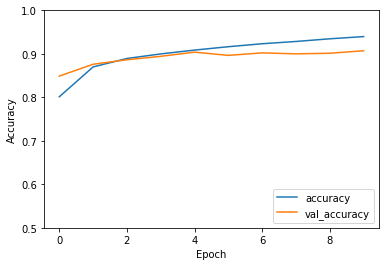

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(img_test,  label_test, verbose=2)

### Data Augmentation

In [9]:
augmented_data = []
augmented_data_ys = []
for i,img in enumerate(img_train):
  #rotate 90 degrees
  augmented_data.append(rotate(img,90))
  augmented_data_ys.append(label_train[i])

  #rotate 180 degrees
  augmented_data.append(rotate(img,180))
  augmented_data_ys.append(label_train[i])

  #rotate 270 degrees
  augmented_data.append(rotate(img,270))
  augmented_data_ys.append(label_train[i])

  #flip left to right
  augmented_data.append(np.fliplr(img))
  augmented_data_ys.append(label_train[i])

KeyboardInterrupt: 

In [23]:
augmented_data = np.array(augmented_data)
augmented_data_ys = np.array(augmented_data_ys)
img_train = np.concatenate((img_train,augmented_data))
print(img_train.shape)
label_train = np.concatenate((label_train,augmented_data_ys))
print(label_train.shape)

(300000, 28, 28, 1)
(300000,)


### CNN with augmented data and GridSearchCV

In [10]:
# Function to create model, required for KerasClassifier
def create_model( activation='relu' , optimizer='adam'):
  model = models.Sequential() # Create the model
  model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28 , 1))) # add the first layer to convole the input matrix using a 3x3 kernal with a relu activation to prevent linearity
  model.add(layers.MaxPooling2D(pool_size = (2, 2))) #pool to decrease dimension of image
  model.add(layers.Conv2D(56, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size = (2, 2))) #pool
  model.add(layers.Conv2D(112, (3, 3), activation='relu'))


  model.add(layers.Flatten())
  model.add(layers.Dense(112, activation=activation))
  model.add(layers.Dense(10))
  model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  model.summary()
  return model

model = KerasClassifier(model=create_model, activation='relu' , optimizer='adam' ,verbose=0)
# define the grid search parameters
activation = ['relu', 'tanh', 'sigmoid']
optimizer = ['SGD', 'Adagrad',  'Adam']
#convnet are sensitive to batch_size and epochs so do grid search on those too
batch_size = [10, 20] #cant try more due to limited ram
epochs = [10, 20, 30]
param_grid = dict( activation=activation, optimizer=optimizer , epochs=epochs, batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=2, cv=5)
print(grid.)
grid_result = grid.fit(img_train, label_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

2022-03-06 13:00:53.063070: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-06 13:00:53.063085: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 56)         0         
 2D)                                

KeyboardInterrupt: 

In [31]:
print(grid.best_params_)
print(grid.best_index_)
print(grid.best_score_)
results_df = pd.DataFrame.from_dict(grid.cv_results_)
print(results_df)
results_df.to_pickle("cnn.pkl")

AttributeError: ignored